# Project: Investigating Appointments With No-Show Patients

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I will be exploring the No Show Patient Appointments dataset.
> I downloaded the No Show Appointments dataset and saved it as 'noshow.csv'.
> Using the Udacity provided Jupyter Notebook template I imported all the packages that might be needed.
> Some questions I look to answer through analyzing this dataset include:
>
> 1) Does age (younger or older) have any kind of impact or relationship in terms of people showing up for appointments or not?
>
> 2) Does the combination of age and scholarship have some kind of impact or relationship in terms of people showing up for appointments or not?
>

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> My initial attempt to read the CSV file led to the following error:
> “UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 3: invalid continuation byte”.

> A quick Google search led to me to this StackOverflow question and the answer I needed to solve this issue.
> https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte

### General Properties
> Load your data and save it to 'appt' (short for appointments).
> The appt dataframe is all the appointments, regardless of whether or not the person showed up or not.
>
> Print out the first few lines using .head(); appt.tail() will print out the last 5 lines from the dataset.

In [2]:
appt = pd.read_csv('noshow.csv', encoding='latin-1')
appt.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Perform operations to inspect data types and look for instances of missing or possibly errant data.
> The describe function helps to get an overview of the data from a statistical summary viewpoint.
> This is also useful for spotting any potential errors that might need a closer look.

In [3]:
appt.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> Perform operations to inspect data types and look for instances of missing or possibly errant data.
> The info function helps to see the different data types for each columns as well as number of rows.
> This is useful as a reference point for column names, data types and row counts too.

In [4]:
appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning

> Taking a closer look at some aspects of the data from the above dataframes.
> The following few cells of code in this section are looking into the maximum listed age of 115.
> First create a sub-group of 'appt' dataframe where 'Age' column values are equal to '115'.

In [9]:
max_age = appt[appt['Age'] == 115]
max_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.200000e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.200000e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.200000e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.200000e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.480000e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SíO JOSí,0,1,0,0,0,1,No


> The following counts the number of unique values in a column (PatientId); we see 2 people are 115 years old.
> Given the wide range of ages in the dataset it isn't possible to tell if these are errors or correct age values.
> It's not impossible or unheard of for someone to live to 115 years old.

In [10]:
max_age['PatientId'].nunique()

2

> Before moving onto the research questions we should clean up the age error of -1 as is show in 'appt_no'.
> Clearly people can't have an age of -1 as that would be pre-birth and at birth you are essentially 0 years old.
> We wil go ahead and select this patient and change their age to 0 and assume this is a new born.
> This will use basically the same code as exploring the 115 year old people above.
> 
> This line of code replaces, in the Age column, the value(s) that are -1 and changes them to 0 (inplace).

In [11]:
min_age = appt[appt['Age'] == -1]
appt.Age.replace([-1],[0], inplace = True)

> To show that it worked and the row wasn't deleted, we will re-run some basic 'tests'.
> We can compare the results to the previous 'tests' on the 'appt' or 'appt_no' dataframe from above.
> We can see that mininum Age is now only 0 and no longer -1. This will slightly alter the other statistics.
> I am only repeating this .describe() function in order to show that the minimum age has been changed.

In [12]:
appt.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088883,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110190,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> Another 'test' for quick comparison purposes to make sure the Age -1 replacement to 0 worked correctly.
> There's still 110,527 rows which shows that the row with Age -1 wasn't removed but the -1 changed to 0.
> Again, I'm only re-using the .info() function to show that the -1 Age row was changed in place and not removed.
> This is useful to make sure a row wasn't removed or for finding column data types.

In [13]:
appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (single variable exploration): 
### Does age (younger or older) have any kind of impact or relationship in terms of people showing up for appointments or not?

> In order to explore the above question we save a copy of the 'appt' dataframe to the 'new_appt' name.
>
> Now, using the 'new_appt' dataframe, we create a boxplot and use Age as the x-axis and "No-show" for the y-axis.
> palette=["g", "r"] sets the colors for the 2 categories, Yes and No. Yes, they missed an appointment or No, means arrived for appointment.
> Then we save the visual to appt_viz in case we need to re-use it later on.

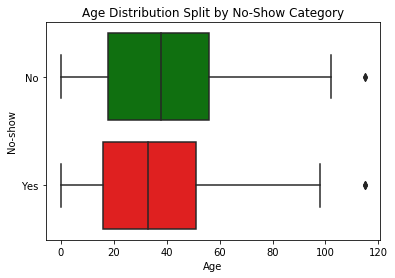

In [22]:
new_appt = appt
appt_viz = sns.boxplot(x="Age", y="No-show", palette=["g", "r"], data=new_appt).set_title(
    'Age Distribution Split by No-Show Category')

> We can see from the boxplot (above) that the people who did not show up for their appointments were younger.
> This doesn't account for the fact that the number of people in "Yes" is about four times smaller than "No".
> I imagine that if each group had closer or same numbers that the "Yes" and "No" visuals would be more similar.
> Further analysis could be done to equalize the "Yes" and "No" group numbers and then re-make the boxplot.
> Lastly, the reason this visual was chosen was because it shows statistical 'outline' of the two groups.

### Research Question 2 (multi-variable exploration):
### Does the combination of age and scholarship have some kind of impact or relationship in terms of people showing up for appointments or not?

> Draw a barplot to show "No-show" status (x-axis) and "Age" (y-axis) and "Scholarship" as the hue.
> For the "Scholarship" hue, the blue (0) means those people didn't have healthcare scholarships but means yes.
> Unfortunately, I was unable to figure out how to add a title to the overall visual.
> I added the No-show categories (No and Yes) as sub-titles to somewhat remedy the situation.
> Below I'll also add a visual title even though it isn't integrated into the visual.
> 
### Age of Scholarship Recipients and Non-Recipients Split By the No-Show Category

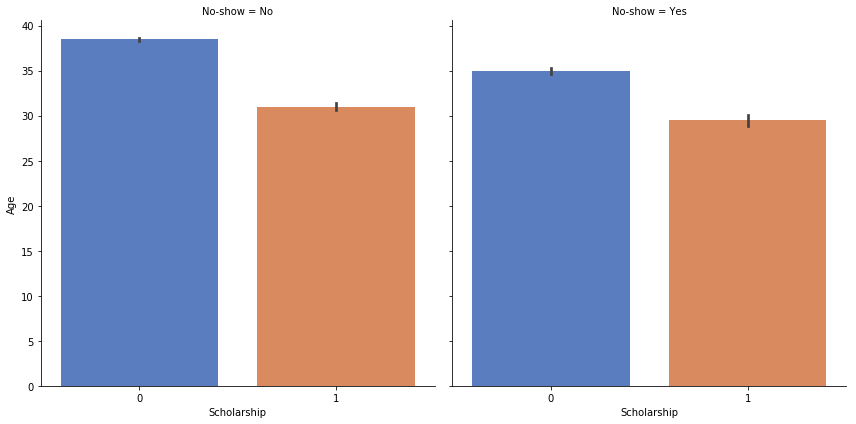

In [21]:
sns.catplot(x="Scholarship", y="Age", col="No-show", data=new_appt, height=6, kind="bar", palette="muted", )

> From the barplot (above) we can see that in the 'didn't show up for an appointment' group (Yes) that the people
> who don't have scholarships (0) were closer in age to those in the same group but did have scholarships (1).
> In the 'did show up for an appointment' group (No), the age difference is noticeably larger, so much larger
> in fact that the people who do have scholarships in the "No" group were almost as young as the people with
> scholarships in the "Yes" group. This is interesting because (as previously mentioned) the "No" group has
> nearly four times more people than the "Yes" group.

<a id='conclusions'></a>
## Conclusions

> Results:
>
> 1) Overall, there wasn't a huge difference in age for those who did or didn't show up to appointments.
> I believe the difference would have been bigger had the group who did show up for appointments not been nearly 4 times larger than the group of people who didn't show up for appointments.
> 
> 2) While the age differences aren't very wide, the people who didn't show up to appointments tended to be 
> younger and that is also the same for whether or not these 2 groups of people had healthcare scholarships. 
> Again, this is also possibly caused by the fact that the No-show=Yes group is about 4 times smaller than the 
> other group.
> 
> 3) Overall, after exploring and cleaning this dataset - I don't believe there is definitive proof that either 
> Age nor Scholarship status has an impact on whether or not a person shows up for their appointment or not. This > is partly due to the fact that the number of people who did show up for appointments was nearly four times more 
> than the number of people who didn't show up for appointments.
>
> Limitations:
>
> 1) Given that Scholarship only has 0 or 1 for possible answers - it was tough to find good visuals that would 
> also be able to work with Scholarship and still provide some insight and be easy to understand.
>
> 2) Lots of the columns used categorical data which makes it more difficult to analyze and visualize. This in 
> turn somewhat hinders the ability to find any strong correlations between columns.
>
> 3) Again, the unbalance split between the No-show Yes and No-show No groups did't allow for a truly balanced or > equal analysis to be done but at the same time this uneven split showed some potentially interesting areas that > could be further explored.